Imports

In [172]:
from qiskit import *
import matplotlib as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Estimator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random, string

Input Variables

In [173]:
password_len = 5
password = "10110"

#generates a random binary password
def random_password_generator(length):
    return ''.join(random.choices('01', k = length))

data_base = [password]

#generates 9 random binary passwords
while len(data_base) < 10:
    new_password = random_password_generator(password_len)

    if new_password not in data_base:
        data_base.append(new_password)
    
random.shuffle(data_base)
print(data_base)

loop_iteration = int(np.floor(np.sqrt(len(data_base)))) #number of iterations for grover_circuit


['10111', '11111', '01110', '10000', '01000', '00111', '10101', '01010', '10110', '11100']


Creating The Oracle

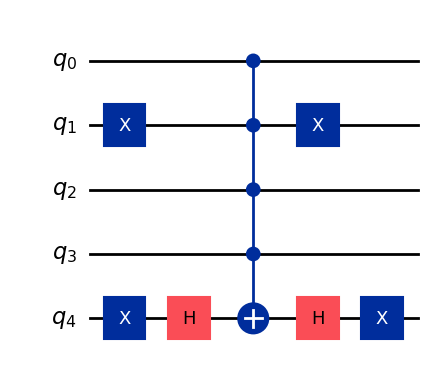

In [ ]:
oracle = QuantumCircuit(password_len,name="Oracle")

#flips the qubit in case it's "0"
def bit_flip(password):
    for index, bit in enumerate(password):
        if bit == "0": 
            oracle.x(index) 

bit_flip(password)
oracle.h(password_len-1)
oracle.mcx(list(range(password_len-1)),password_len-1)
oracle.h(password_len-1)
bit_flip(password)

oracle_gate= oracle.to_gate()
oracle.draw("mpl")

Diffusion Operator

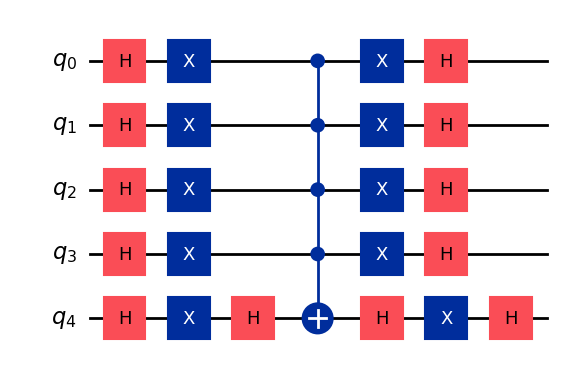

In [175]:
diffusion = QuantumCircuit(password_len,name="Diffusion")
diffusion.h(range(password_len)) # applies an H gate to every qubit 
diffusion.x(range(password_len))
diffusion.h(password_len-1)
diffusion.mcx(list(range(password_len-1)), password_len-1)
diffusion.h(password_len-1)
diffusion.x(range(password_len))
diffusion.h(range(password_len))

diffusion_gate = diffusion.to_gate()
diffusion.draw("mpl")

Grover Circuit

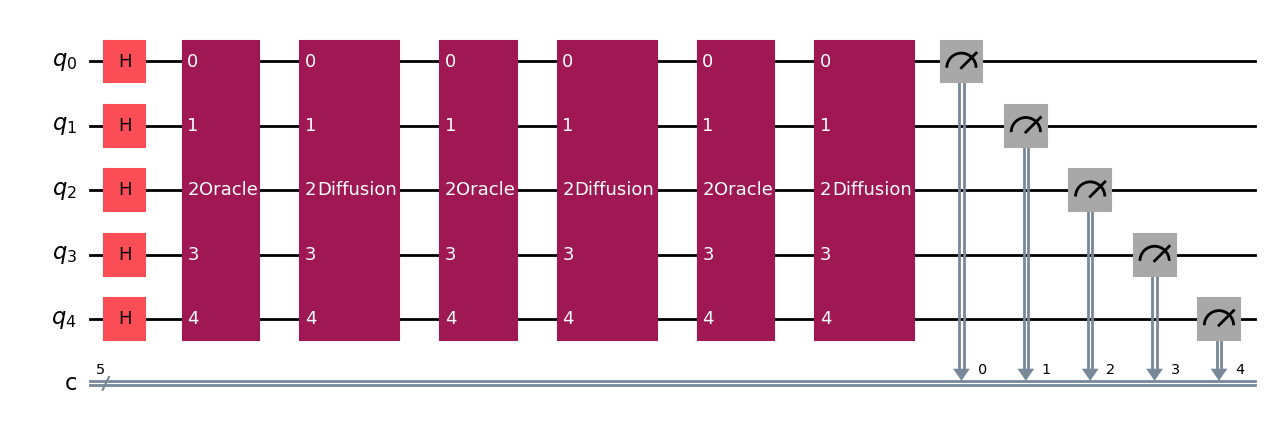

In [176]:
grover_circuit = QuantumCircuit(password_len,password_len)
grover_circuit.h(range(password_len))

#Applying the oracle's and diffusion's gate i times
for i in range(loop_iteration):
    grover_circuit.append(oracle,range(password_len))
    grover_circuit.append(diffusion,range(password_len))

grover_circuit.measure(range(password_len),range(password_len))

grover_circuit.draw("mpl")

Grover Circuit Simulation

In [177]:

backend = AerSimulator()  
transpiled_circuit = transpile(grover_circuit, backend)
result = backend.run(transpiled_circuit, shots=70).result()
shots = result.get_counts()
print("result: ", shots)


result:  {'10101': 1, '01101': 59, '10010': 1, '11111': 1, '10110': 1, '01001': 1, '00000': 1, '10011': 1, '10001': 1, '01010': 1, '00101': 1, '11100': 1}


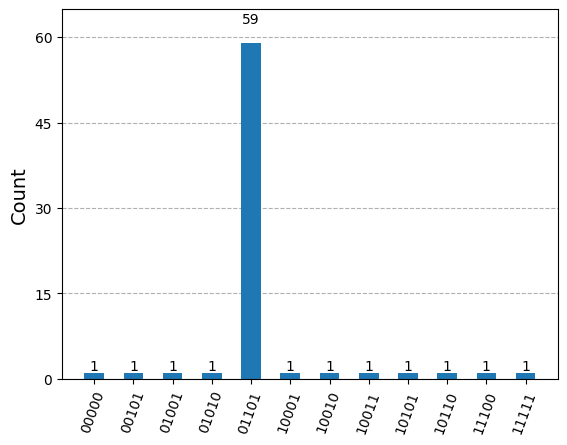

In [178]:
plot_histogram(shots)